In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import joblib

# Load your unseen dataset
df = pd.read_csv("/content/LA_2021.csv")[:30000]

df_unseen = df[df['is_day']==True]

# Select the input columns (must match the columns used during training)
input_columns = ['GHI', 'Temperature', 'Relative Humidity', 'Solar Zenith Angle']

# Lag function to prepare time series data
def create_lagged_data(data, lag=432):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i + lag])
        y.append(data[i + lag])
    return np.array(X), np.array(y)


In [ ]:
df_unseen

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Temperature,is_day
42,2021,1,1,7,0,10,226,14,50.84,88.99,4.0,True
43,2021,1,1,7,10,17,348,33,49.09,87.38,4.5,True
44,2021,1,1,7,20,23,446,56,47.41,85.73,5.0,True
45,2021,1,1,7,30,28,525,82,46.11,84.08,5.4,True
46,2021,1,1,7,40,32,589,110,44.14,82.45,5.9,True
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2021,7,28,7,10,93,673,404,25.57,62.53,34.6,True
29996,2021,7,28,7,20,97,692,437,25.15,60.52,34.9,True
29997,2021,7,28,7,30,100,710,471,24.60,58.50,35.3,True
29998,2021,7,28,7,40,104,719,501,23.77,56.49,35.6,True


In [ ]:
lag = 1000
X_unseen, y_unseen = create_lagged_data(df_unseen[input_columns].values, lag=lag)

# Load the saved StandardScaler from training
scaler = joblib.load('/content/scaler (3).joblib')

# Scale the unseen data using the same scaler
X_unseen_scaled = scaler.transform(X_unseen.reshape(-1, 4)).reshape(X_unseen.shape)

# Load the trained LSTM model
model = load_model('/content/lstm_model.h5')

# Make predictions on the unseen data
y_pred_unseen = model.predict(X_unseen_scaled)

467/467 [==============================] - 113s 238ms/step


In [ ]:
import pandas as pd

# Assuming y_pred and y_test are NumPy arrays or Pandas DataFrames
y_pred_df = pd.DataFrame(y_pred_unseen, columns=['GHI_p', 'Temperature_p', 'Relative Humidity_p', 'Solar Zenith Angle_p'])
y_unseen_df = pd.DataFrame(y_unseen, columns=['GHI', 'Temperature', 'Relative Humidity', 'Solar Zenith Angle'])

# Combine the DataFrames
combined_df = pd.concat([y_unseen_df, y_pred_df], axis=1)

# Print the combined DataFr
combined_df

,GHI,Temperature,Relative Humidity,Solar Zenith Angle,GHI_p,Temperature_p,Relative Humidity_p,Solar Zenith Angle_p
0,183.0,19.9,7.51,78.29,186.528259,22.899544,13.183283,74.918678
1,152.0,19.9,7.51,79.92,154.819565,22.473370,13.894031,76.604469
2,122.0,17.3,8.79,81.58,121.167221,21.894156,14.631805,78.410751
3,93.0,17.1,8.90,83.26,88.635620,20.042435,16.457533,80.467400
4,65.0,16.9,9.01,84.97,64.009758,19.519087,17.243177,82.152916
...,...,...,...,...,...,...,...,...
14925,404.0,34.6,25.57,62.53,404.522583,32.663300,22.842783,63.190125
14926,437.0,34.9,25.15,60.52,434.487183,33.026871,23.019508,61.332008
14927,471.0,35.3,24.60,58.50,464.486755,33.371895,23.106548,59.669495
14928,501.0,35.6,23.77,56.49,494.577026,33.698593,22.820896,58.083336


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_unseen, y_pred_unseen))

# Calculate MSE
mse = mean_squared_error(y_unseen, y_pred_unseen)

# Calculate R2 score
r2 = r2_score(y_unseen, y_pred_unseen)

# Print the results
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')


RMSE: 31.16001902138025
MSE: 970.946785412779
R2 Score: 0.8729541565064978


In [ ]:
combined_df.describe()

,GHI,Temperature,Relative Humidity,Solar Zenith Angle,GHI_p,Temperature_p,Relative Humidity_p,Solar Zenith Angle_p
count,14930.000000,14930.000000,14930.000000,14930.000000,14930.000000,14930.000000,14930.000000,14930.000000
mean,495.679705,26.835727,17.470448,55.244305,499.762573,26.647875,18.755096,54.917156
std,325.988705,10.464324,12.011109,22.437631,321.097229,8.934847,10.639097,21.666271
min,0.000000,1.200000,2.270000,12.730000,-19.521162,4.790005,-0.613389,11.212128
25%,203.000000,18.300000,8.950000,37.890000,211.948654,19.396159,11.837817,38.048532
50%,502.000000,27.500000,13.350000,55.520000,509.500504,27.730279,15.851689,55.342247
75%,786.000000,35.300000,22.800000,72.510000,795.875381,34.698897,22.771980,70.919889
max,1081.000000,47.000000,79.670000,102.870000,971.805969,46.545029,66.453568,104.814613


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(combined_df['GHI'], combined_df['GHI_p']))

# Calculate MSE
mse = mean_squared_error(combined_df['GHI'], combined_df['GHI_p'])

# Calculate R2 score
r2 = r2_score(combined_df['GHI'], combined_df['GHI_p'])

# Print the results
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')


RMSE: 61.66677717679015
MSE: 3802.7914073718866
R2 Score: 0.9642129014616937


<Axes: >

<Figure size 2500x800 with 0 Axes>

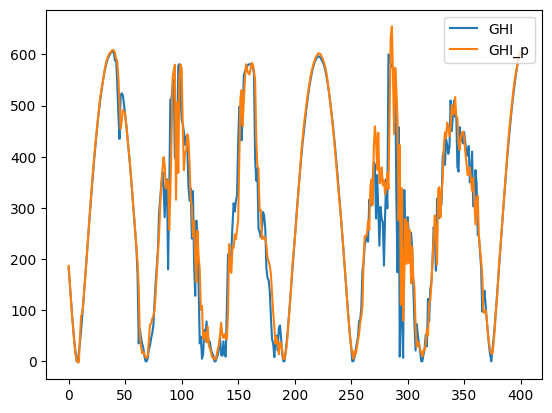

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
combined_df[['GHI','GHI_p']][:400].plot()

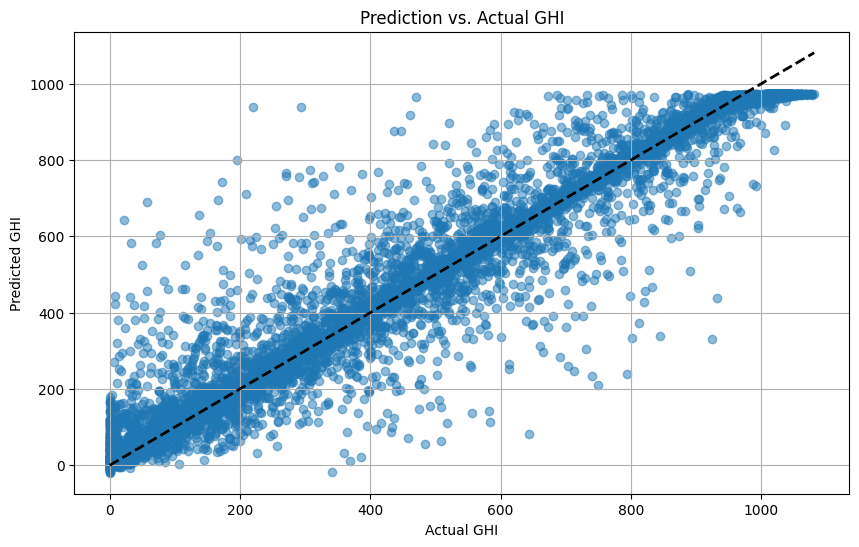

In [ ]:
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame with the specified column names
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot actual vs. predicted values
plt.scatter(combined_df['GHI'], combined_df['GHI_p'], alpha=0.5)
plt.xlabel('Actual GHI')
plt.ylabel('Predicted GHI')
plt.title('Prediction vs. Actual GHI')
plt.grid(True)

# Add a diagonal reference line for perfect predictions
plt.plot([combined_df['GHI'].min(), combined_df['GHI'].max()], [combined_df['GHI'].min(), combined_df['GHI'].max()], 'k--', lw=2)

plt.show()


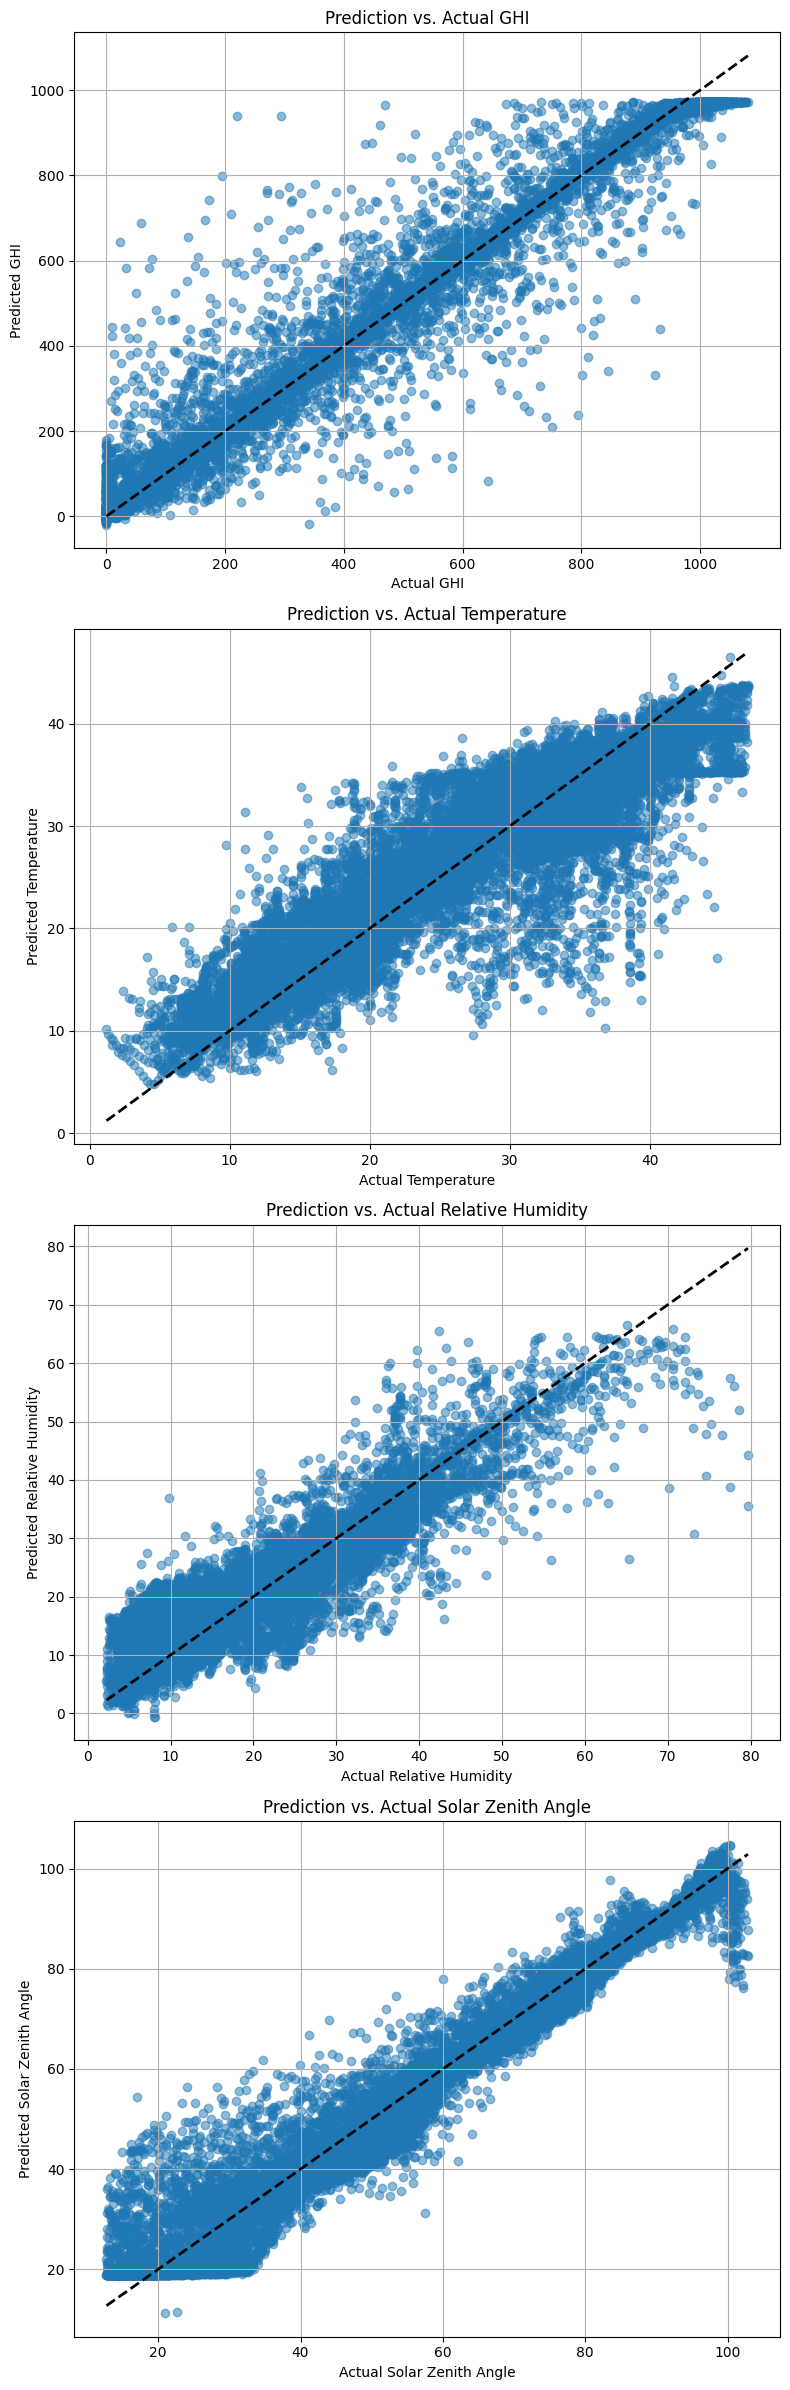

In [ ]:
import matplotlib.pyplot as plt

# Specify the columns for which you want to create prediction vs. actuals plots
columns_to_plot = ['GHI', 'Temperature', 'Relative Humidity', 'Solar Zenith Angle']

# Set the figure size and adjust the number of rows and columns in the subplot grid
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 6 * len(columns_to_plot)))

# Iterate through the columns and create subplots
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.scatter(combined_df[column], combined_df[f'{column}_p'], alpha=0.5)
    ax.set_xlabel(f'Actual {column}')
    ax.set_ylabel(f'Predicted {column}')
    ax.set_title(f'Prediction vs. Actual {column}')
    ax.grid(True)

    # Add a diagonal reference line for perfect predictions
    ax.plot([combined_df[column].min(), combined_df[column].max()], [combined_df[column].min(), combined_df[column].max()], 'k--', lw=2)

plt.tight_layout()
plt.show()


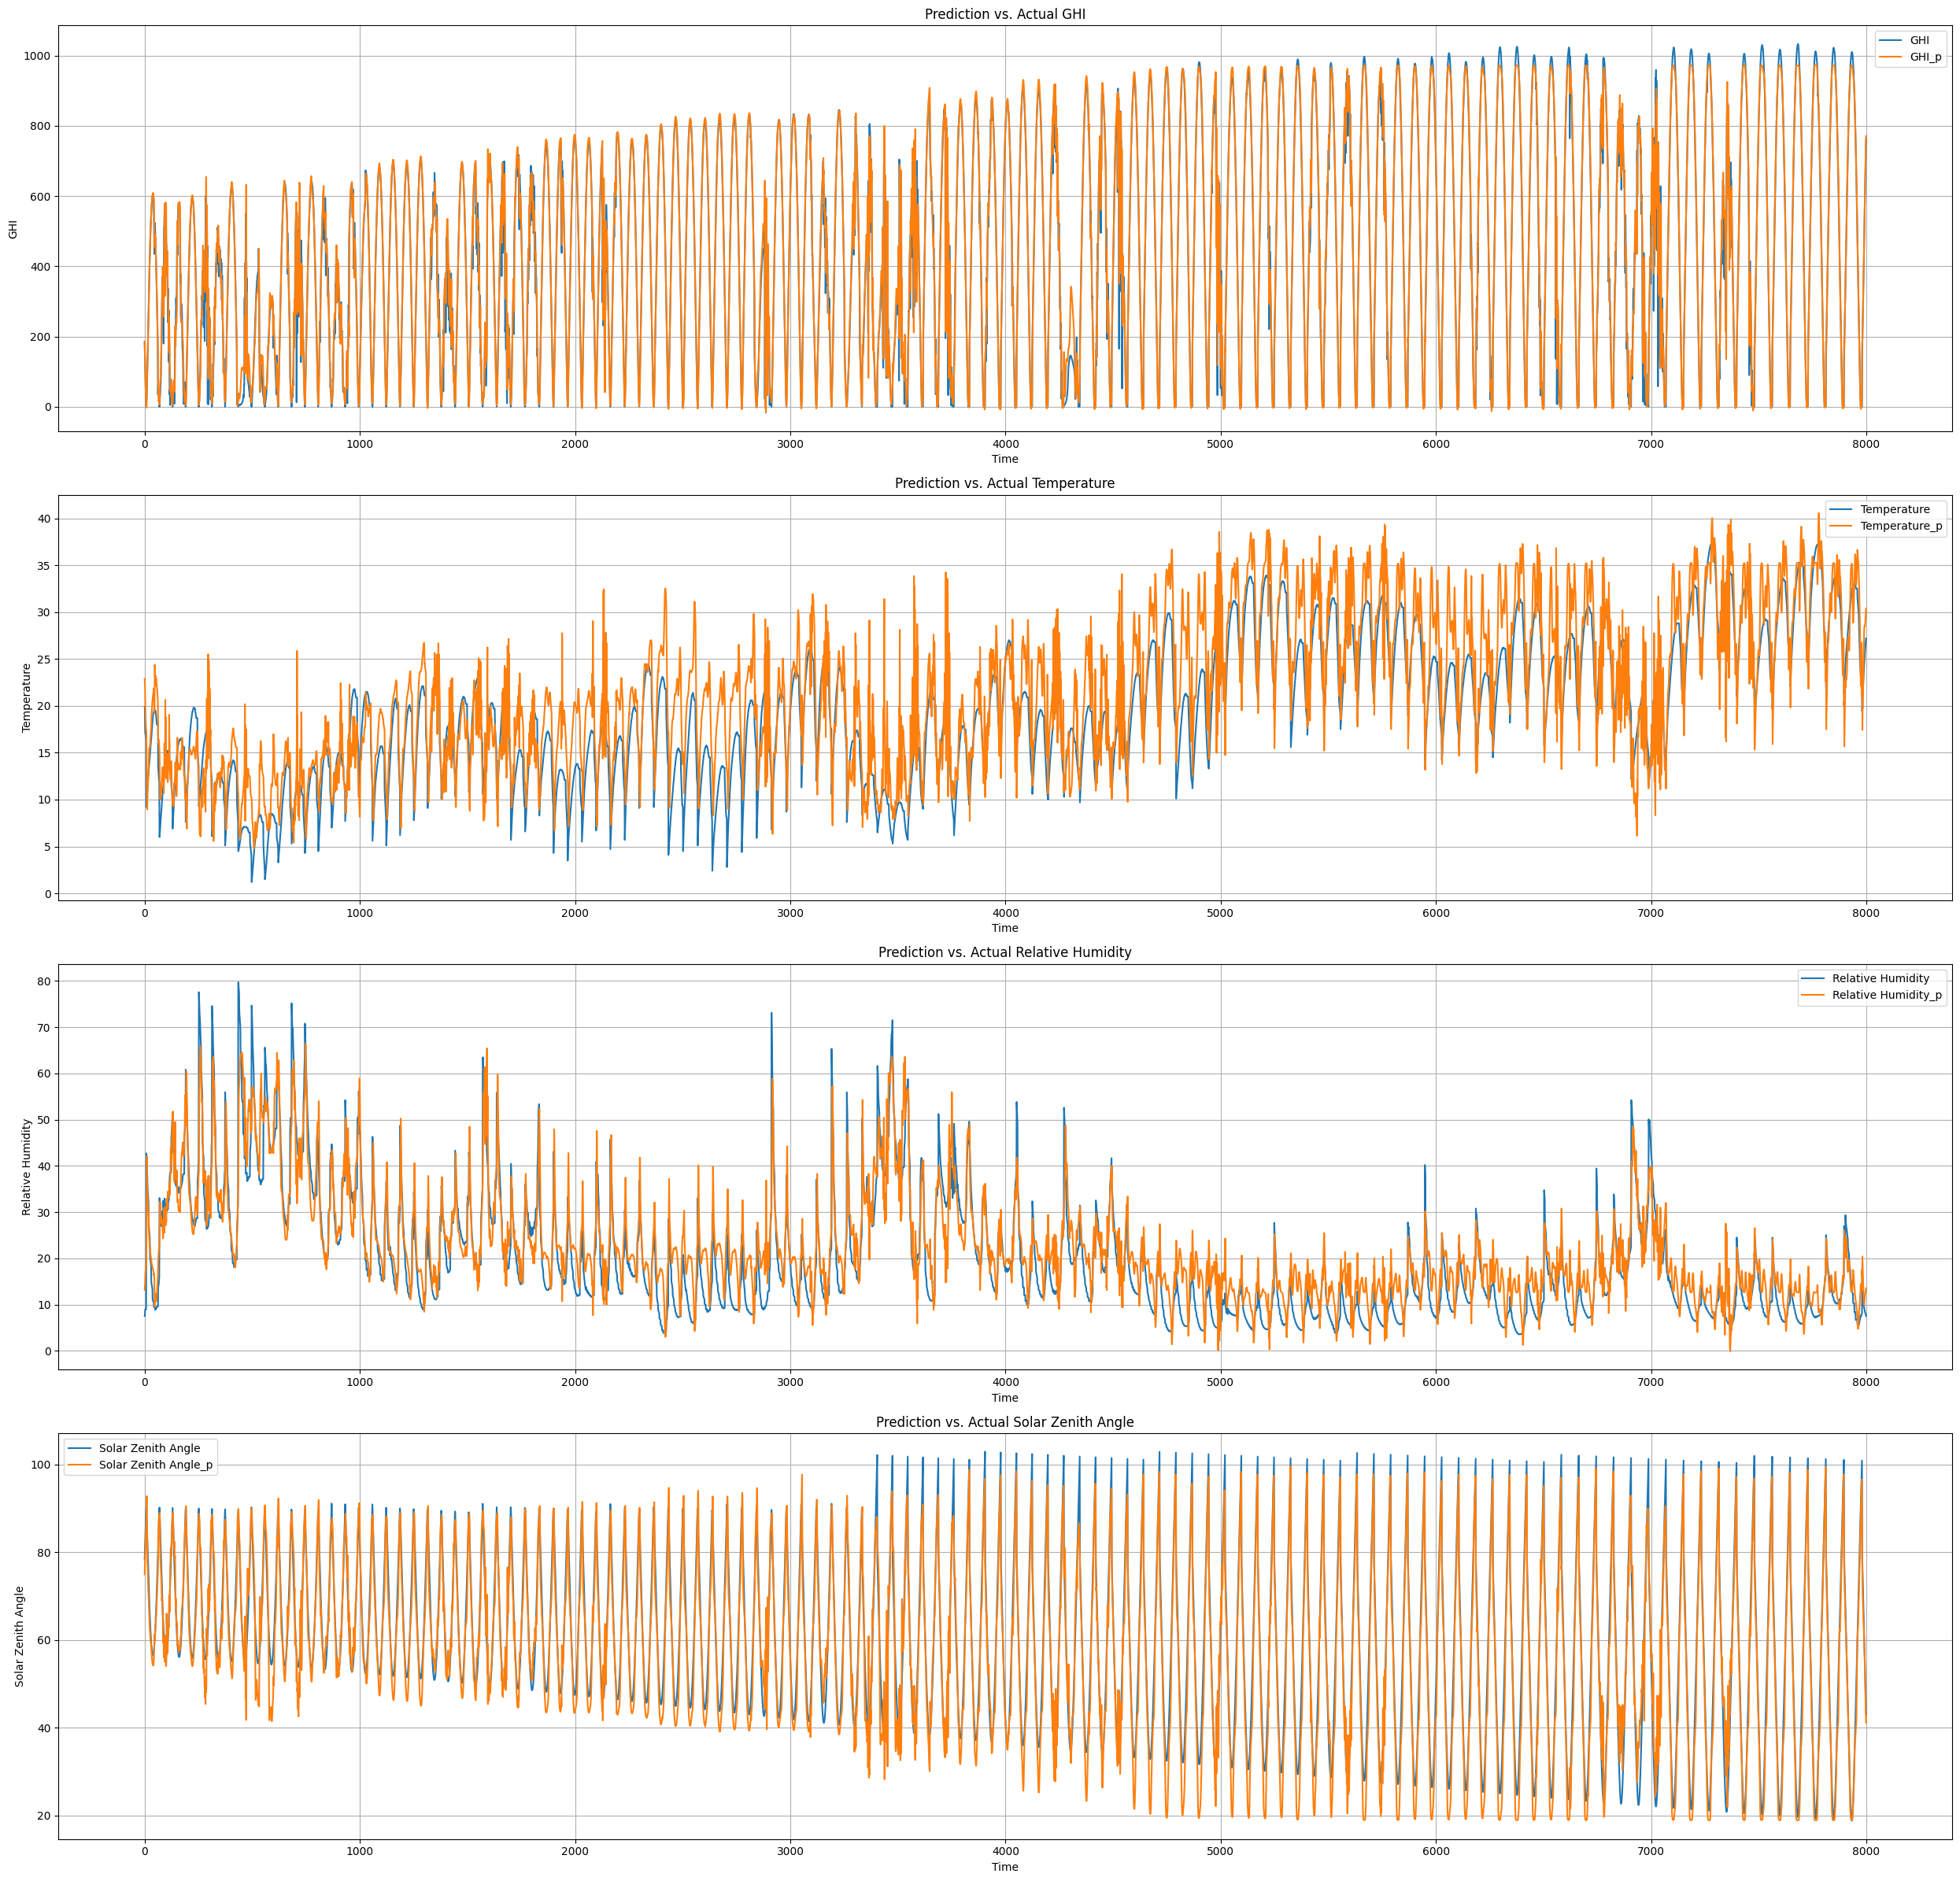

In [ ]:
import matplotlib.pyplot as plt

# Specify the columns for which you want to create prediction vs. actuals plots
columns_to_plot = ['GHI', 'Temperature', 'Relative Humidity', 'Solar Zenith Angle']

# Set the figure size and adjust the number of rows and columns in the subplot grid
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(25, 6 * len(columns_to_plot)))

# Iterate through the columns and create subplots
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    combined_df[[column, f'{column}_p']][:8000].plot(ax=ax)
    ax.set_xlabel('Time')  # You may need to adjust the x-axis label based on your data
    ax.set_ylabel(f'{column}')
    ax.set_title(f'Prediction vs. Actual {column}')
    ax.grid(True)

plt.tight_layout()
plt.show()
